In [48]:
from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import numpy as np
import xarray as xr

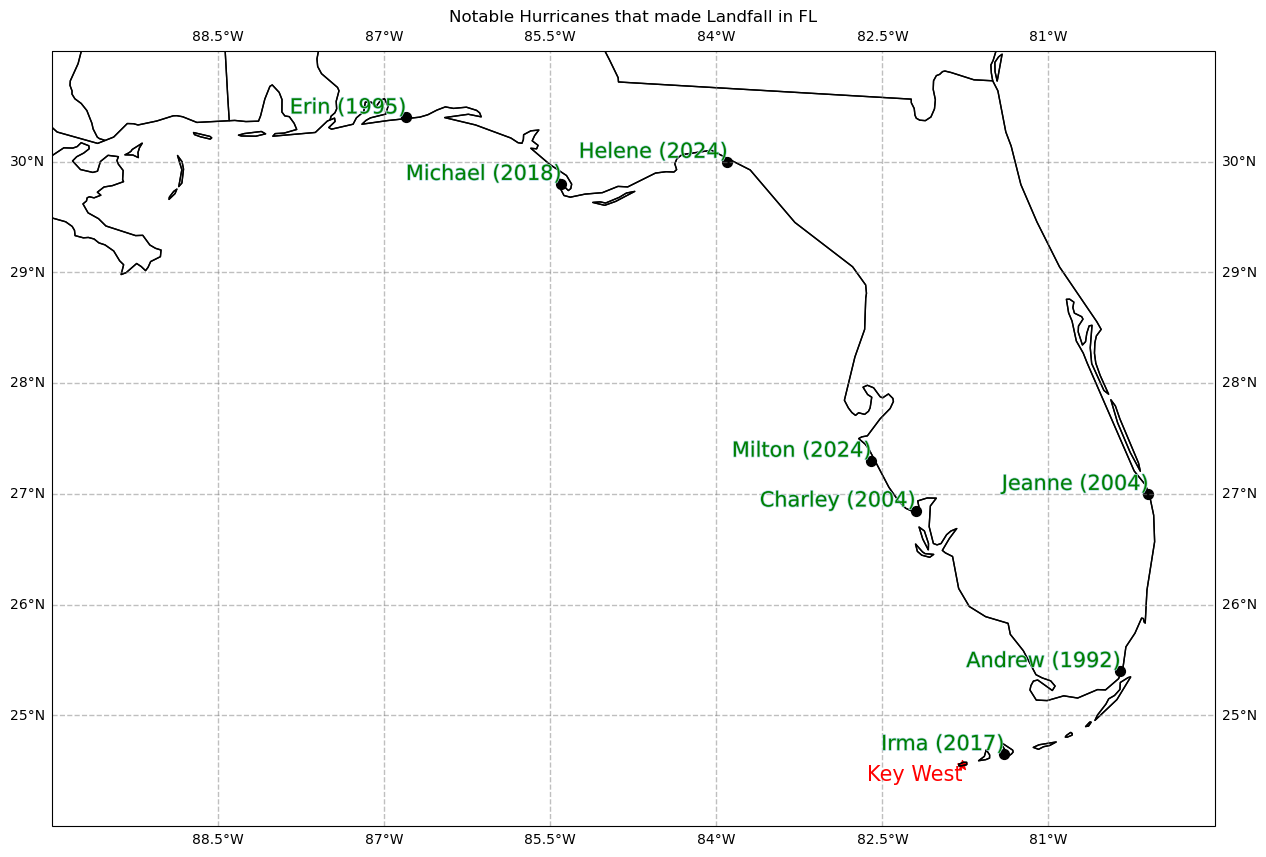

In [52]:
mapcrs = ccrs.PlateCarree()

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection=mapcrs)

ax.set_extent([-90, -79.5, 24, 31], ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))

hurricanes = {
    "Erin (1995)":    (-86.8, 30.4),
    "Charley (2004)": (-82.2, 26.85),
    "Michael (2018)": (-85.4, 29.8),
#    "Idalia (2023)":  (-83.7, 29.9),
    "Irma (2017)":    (-81.4, 24.65),
    "Andrew (1992)":  (-80.35, 25.4),
    "Jeanne (2004)":  (-80.1, 27.0),
    "Milton (2024)":  (-82.6, 27.3),
    "Helene (2024)":  (-83.9, 30.0),
    
}

# Define city coordinates (longitude, latitude) 
cities = {
    #"Melbourne": (-80.6081, 28.0836),
    #"Cape Canaveral": (-80.6043, 28.3922),
    #"Miami": (-80.1918, 25.7617),
    "Key West": (-81.7799, 24.5551),
    #"Pensacola": (-87.2169, 30.4213),
    #"Jacksonville": (-81.6557, 30.3322),
    #"Tampa": (-82.4572, 27.9506),  # Added Tampa!
}

# Add city labels
for city, (lon, lat) in cities.items():
    plt.scatter(lon, lat, s=50, transform = ccrs.PlateCarree(), color='red', marker="*", edgecolor="red")  # City marker
    plt.text(lon, lat, city, transform = ccrs.PlateCarree(), fontsize=15, ha="right", va="top", color="red")  # City name

for hurricane, (lon, lat) in hurricanes.items():
    plt.scatter(lon, lat, s=50, transform = ccrs.PlateCarree(), color = 'black', marker="o", edgecolor="black")  # City marker
    text_obj = plt.text(lon, lat, hurricane, transform = ccrs.PlateCarree(), fontsize=15, ha="right", va="bottom", color="green")
    text_obj.set_path_effects([path_effects.Stroke(linewidth=1, foreground='lightblue'),
                       path_effects.Normal()])# City name

grid = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

ax.set_title('Notable Hurricanes that made Landfall in FL')
fig.savefig('Florida_notable_hurricanes_map.png', bbox_inches = 'tight', dpi=300)